In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(0)

In [3]:
points, labels = make_blobs(centers=2, cluster_std=1)

In [4]:
df = pd.DataFrame(points)
df.columns = ['x','y']
df['class'] = labels

In [5]:
dataset_train = df.sample(n=5, random_state=0)

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
l = LogisticRegression()

In [8]:
l.fit(dataset_train[['x','y']], dataset_train['class'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
l.coef_

array([[ 0.6801069 , -0.71907952]])

In [10]:
l.intercept_

array([0.21686569])

In [11]:
x_min, x_max = df['x'].values.min() - .5, df['x'].max() + .5
y_min, y_max = df['y'].min() - .5, df['y'].max() + .5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = l.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

In [12]:
source = pd.DataFrame({'x': xx.ravel(),
                     'y': yy.ravel(),
                     'z': Z.ravel()})

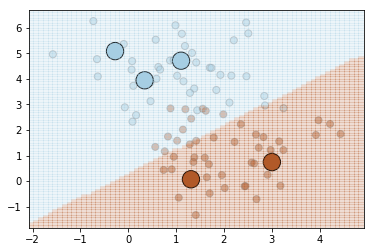

In [13]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(dataset_train['x'], dataset_train['y'], c= dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

In [14]:
least_confident_ix = pd.DataFrame(l.predict_proba(df[['x','y']])).max(axis=1).idxmin()
least_confident_ix

56

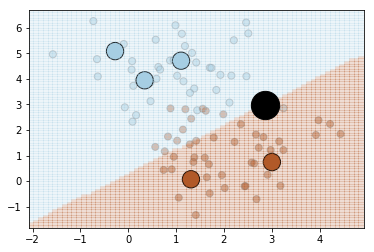

In [15]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(dataset_train['x'], dataset_train['y'], c= dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(df.iloc[least_confident_ix]['x'], df.iloc[least_confident_ix]['y'], c= 'k', 
            edgecolors='k', s=800, cmap=plt.cm.Paired )

In [16]:
new_dataset_train = dataset_train.append(df.iloc[least_confident_ix])
new_dataset_train

,x,y,class
26,1.310513,0.071225,1.0
86,3.002519,0.742654,1.0
2,-0.276525,5.081278,0.0
55,1.103182,4.705777,0.0
75,0.341948,3.941046,0.0
56,2.859421,2.956028,0.0


In [17]:
l = LogisticRegression()
l.fit(new_dataset_train[['x','y']], new_dataset_train['class'])
x_min, x_max = df['x'].values.min() - .5, df['x'].max() + .5
y_min, y_max = df['y'].min() - .5, df['y'].max() + .5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = l.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

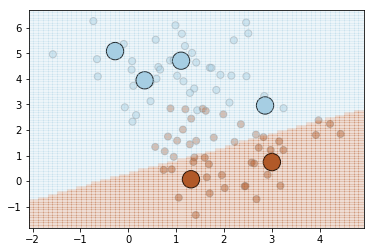

In [18]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(new_dataset_train['x'], new_dataset_train['y'], c= new_dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

In [19]:
least_confident_ix = pd.DataFrame(l.predict_proba(df[['x','y']])).max(axis=1).idxmin()
least_confident_ix

90

In [20]:
df.iloc[least_confident_ix]['class']

1.0

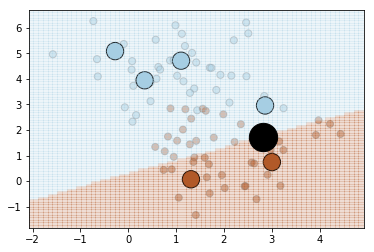

In [21]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(new_dataset_train['x'], new_dataset_train['y'], c= new_dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(df.iloc[least_confident_ix]['x'], df.iloc[least_confident_ix]['y'], c= 'k', 
            edgecolors='k', s=800, cmap=plt.cm.Paired )

In [22]:
new_dataset_train = new_dataset_train.append(df.iloc[least_confident_ix])
new_dataset_train

,x,y,class
26,1.310513,0.071225,1.0
86,3.002519,0.742654,1.0
2,-0.276525,5.081278,0.0
55,1.103182,4.705777,0.0
75,0.341948,3.941046,0.0
56,2.859421,2.956028,0.0
90,2.827058,1.721168,1.0


In [23]:
l = LogisticRegression()
l.fit(new_dataset_train[['x','y']], new_dataset_train['class'])
x_min, x_max = df['x'].values.min() - .5, df['x'].max() + .5
y_min, y_max = df['y'].min() - .5, df['y'].max() + .5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = l.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

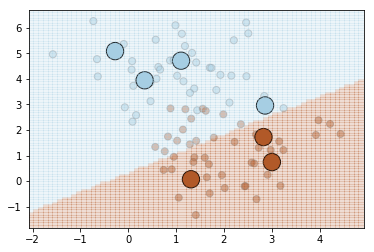

In [24]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(new_dataset_train['x'], new_dataset_train['y'], c= new_dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

In [26]:
least_confident_ix = pd.DataFrame(l.predict_proba(df[['x','y']])).max(axis=1).idxmin()
least_confident_ix

14

In [27]:
df.iloc[least_confident_ix]['class']

1.0

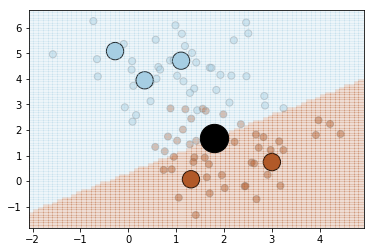

In [28]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(dataset_train['x'], dataset_train['y'], c= dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(df.iloc[least_confident_ix]['x'], df.iloc[least_confident_ix]['y'], c= 'k', 
            edgecolors='k', s=800, cmap=plt.cm.Paired )

In [29]:
new_dataset_train = new_dataset_train.append(df.iloc[least_confident_ix])
new_dataset_train

,x,y,class
26,1.310513,0.071225,1.0
86,3.002519,0.742654,1.0
2,-0.276525,5.081278,0.0
55,1.103182,4.705777,0.0
75,0.341948,3.941046,0.0
56,2.859421,2.956028,0.0
90,2.827058,1.721168,1.0
14,1.787264,1.700120,1.0


In [30]:
l = LogisticRegression()
l.fit(new_dataset_train[['x','y']], new_dataset_train['class'])
x_min, x_max = df['x'].values.min() - .5, df['x'].max() + .5
y_min, y_max = df['y'].min() - .5, df['y'].max() + .5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = l.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

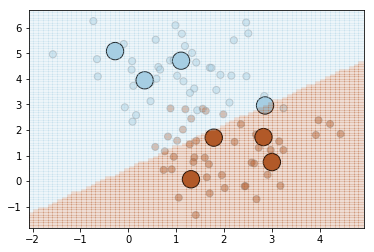

In [31]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(new_dataset_train['x'], new_dataset_train['y'], c= new_dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)